In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from model import MWModel

The population model is defined as follows:

$$
\frac{dM}{dt} = r-\frac{1}{\tau_0+\eta b w W}M-b (1-w)MW 
$$
$$
\frac{dW}{dt} = \frac{1}{\tau_0+\eta b w W}M-bwMW 
$$

In [72]:
def run_sim(model, M0, W0, steps=1000, dt=0.01):
    model.set_population(M0, W0)
    
    times = [0]
    traj = [[model.M, model.W]]

    for i in range(steps):
        model.step(dt)
        times.append(times[-1]+dt)
        traj.append([model.M, model.W])

    traj = np.array(traj)    
    
    fig, ax = plt.subplots()
    
    ax.set_xlim(0, times[-1])
    
    ax.plot(times, traj[:,0], c=(1, 0.5, 0.5), lw=2, label='M')
    ax.plot(times, traj[:,1], c=(0.2, 0.0, 0.4), lw=2, label='W')
    
    ax.axhline(model.eqWpop(), c=(0,0,0), lw=0.5, ls='--')
    
    ax.legend()
    
    return times, traj, fig, ax

In [106]:
model = MWModel(r=50, w=0.5, b=0.1)
model.r = model.eqTotDecayRate()*20

<IPython.core.display.Javascript object>


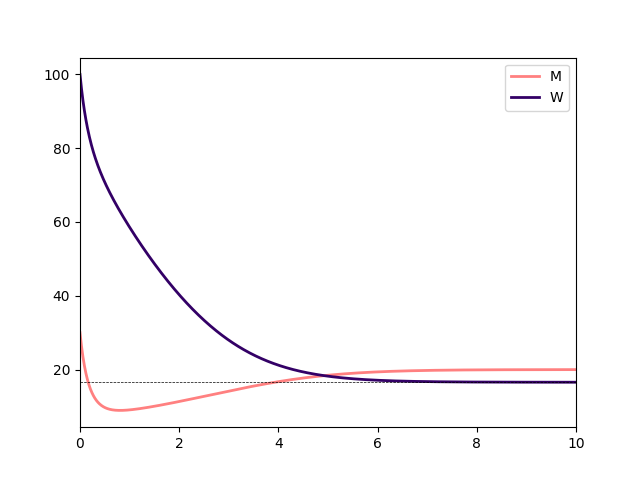

In [107]:
times, traj, fig, ax = run_sim(model, 30, 100, steps=1000)

<IPython.core.display.Javascript object>


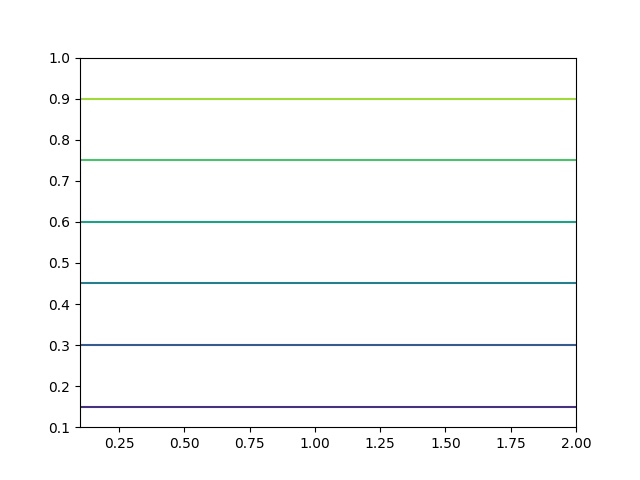

In [128]:
# Contour plot of energy conversion
brange = np.linspace(0.1, 2)
wrange = np.linspace(0.1, 1)

mdl = MWModel(t0=1, eta=0.25)

Cmap = []

for b in brange:
    Cmap.append([])
    for w in wrange:
        mdl.b = b
        mdl.w = w
        Weq = mdl.eqWpop()
        C = 1/(1+b*(1-w)*Weq*(mdl.t0+mdl.eta*b*w*Weq))
        Cmap[-1].append(C)
        
Z = np.array(Cmap)
X, Y = np.meshgrid(brange, wrange, indexing='ij')

fig, ax = plt.subplots()

ax.contour(X, Y, Z)

<IPython.core.display.Javascript object>


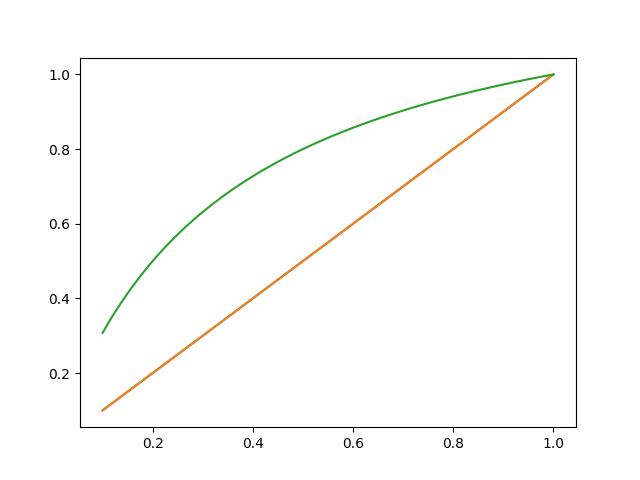

In [133]:
fig, ax = plt.subplots()

ax.plot(wrange, Z[0])
ax.plot(wrange, wrange)
ax.plot(wrange, 4*wrange/(3*wrange+1))